In [12]:
import numpy as np
from scipy.stats import t as t_dist, norm, cauchy, laplace
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
def noiseless(X):
    return np.exp(-1/(X**6))
        #return 1.5*np.abs((X[:,0]-0.4)*(X[:,0]-0.6))+0.5*np.exp(X[:,0])

def quantile(X, q):
    return noiseless(X) + norm.ppf(q,0,0.05)

def sample(X):
    return noiseless(X) + norm.rvs(0,0.05,size=X.shape[0])

In [61]:
mu_1=0 #the mean of source
mu_2=0.5 #the mean of target
sigma_1_sq= 0.4 #the variance of source
sigma_2_sq= 0.3   #the variance of target
n_tr=100
n_te=100
X_line=np.linspace(-3,3,1000)
X_tr=np.random.normal(mu_1,np.sqrt(sigma_1_sq),n_tr)
X_te=np.random.normal(mu_2,np.sqrt(sigma_2_sq),n_tr)
y_tr=sample(X_tr)
quantile_a = quantile(X_line,0.05)
quantile_b = quantile(X_line,0.25)
quantile_c = quantile(X_line,0.5)
quantile_d = quantile(X_line,0.75)
quantile_e = quantile(X_line,0.95)
y_te=sample(X_te)
y_line=noiseless(X_line)

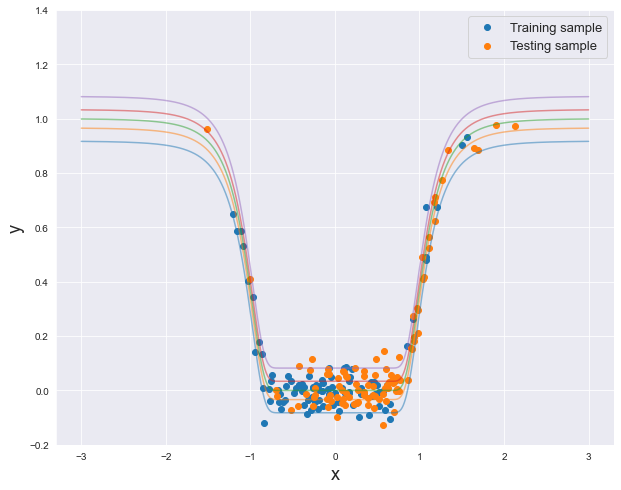

In [62]:
sns.set_style("darkgrid")
sns.color_palette("Paired",10)
plt.figure(figsize=(10,8))

plt.plot(X_line,quantile_a,alpha=0.5)
plt.plot(X_line,quantile_b,alpha=0.5)
plt.plot(X_line,quantile_c,alpha=0.5)
plt.plot(X_line,quantile_d,alpha=0.5)
plt.plot(X_line,quantile_e,alpha=0.5)
plt.scatter(X_tr,y_tr,alpha=1,label='Training sample')
plt.scatter(X_te,y_te,alpha=1,label='Testing sample')
plt.ylabel("y", fontsize=18)
plt.xlabel("x",fontsize=18)
plt.ylim([-0.2, 1.4])
font3 ={
    'weight':'normal',
    'size': 13,
}
plt.legend(prop=font3,loc=1)
plt.savefig("bounded.png",pad_inches=0.15, bbox_inches='tight' ,dpi=500)
plt.show()